# 用Matplotlib画三维图

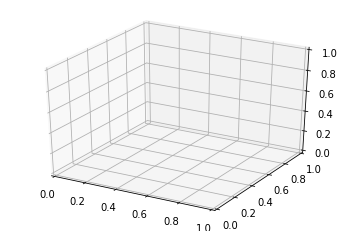

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

fig = plt.figure()
ax = plt.axes(projection='3d')

In [ ]:
## 三维数据点与线
最基本的三维图是由(x, y, z)三维坐标点构成的线图与散点图。下面来画一个螺旋线，在线上随机分布一些散点，代码示例如下：

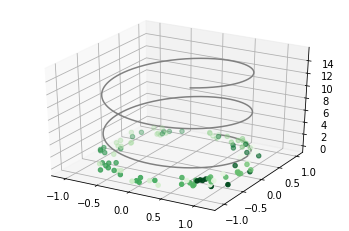

In [2]:
ax = plt.axes(projection = '3d')

# 三维线的数据
zline = np.linspace(0, 15, 1000)
xline = np.sin(zline)
yline = np.cos(zline)
ax.plot3D(xline, yline, zline, 'gray')

# 三维散点的数据
zdata = 15 * np.random.random(100)
xdata = np.sin(zdata) + 0.1 * np.random.randn(100)
ydata = np.cos(zdata) + 0.1 * np.random.randn(100)
ax.scatter3D(xdata, ydata, c=zdata, cmap='Greens');

In [ ]:
## 三维等高线图
mplot3d也有同样的输入数据创建三维晕渲图的工具。与二维ax.contour图形一样，ax.contour3D要求所有数据都是二维网格数据的形式，并且由函数计算
z轴数值。下面演示一个用三维正弦函数画的三维登高线图，代码示例如下：

In [4]:
def f(x, y):
    return np.sin(np.sqrt(x ** 2 + y ** 2))

x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

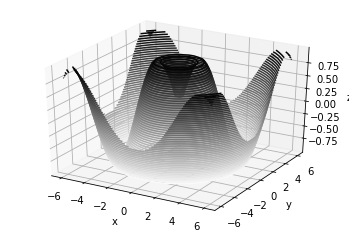

In [7]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.savefig(r"D:\Python-Excel\Data-analysis\Python-Data-Science\Matplotlib\images\3d.jpg")

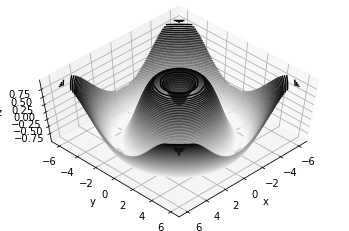

In [13]:
# 调整三维图的观察视角
ax.view_init(60, 45)
fig

In [ ]:
## 线框图和曲面图
线框图和曲面图都是将网格数据映射成三维曲面，得到的三维形状非常容易可视化，以下是代码示例：

Text(0.5, 0.92, 'wireframe')

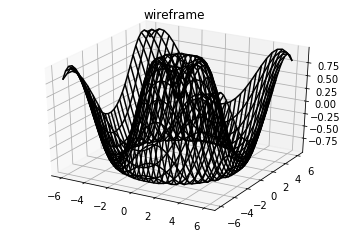

In [14]:
# 线框图
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_wireframe(X, Y, Z, color = 'black')
ax.set_title('wireframe')

In [ ]:
### 三维曲面图
曲面图与线框图类似，只不过线框图的每个面都是由多边形构成的。只要增加一个配色方案来填充这些多边形，就可以让读者感受到可视化图形表面的拓扑结构。
示例代码如下：

Text(0.5, 0.92, 'surface')

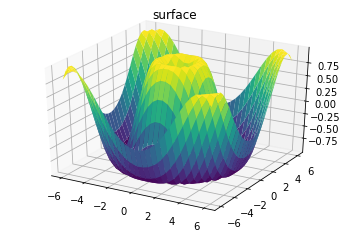

In [19]:
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, 
                cmap='viridis', edgecolor='none')

ax.set_title('surface')

In [ ]:
### 极坐标曲面图
画曲面图需要二维数据，但可以不是直角坐标系。当我们把它画成surface3D图形时，可以获得一种使用了切片的可视化效果。示例代码如下：

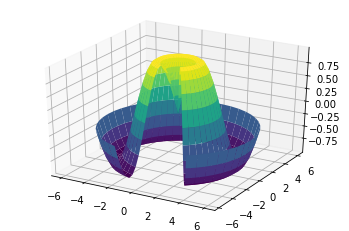

In [20]:
r = np.linspace(0, 6, 20)
theta = np.linspace(-0.9 * np.pi, 0.8 * np.pi, 40)
r, theta = np.meshgrid(r, theta)

X = r * np.sin(theta)
Y = r * np.cos(theta)
Z = f(X, Y)

ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, 
                cmap='viridis', edgecolor='none')

In [ ]:
## 曲面三角剖分

In [21]:
theta = 2 * np.pi * np.random.random(1000)
r = 6 * np.random.random(1000)
x = np.ravel(r * np.sin(theta))
y = np.ravel(r * np.cos(theta))
z = f(x, y)

In [ ]:
可以先为数据点创建一个散点图，对将要采样的图形有一个基本认识：

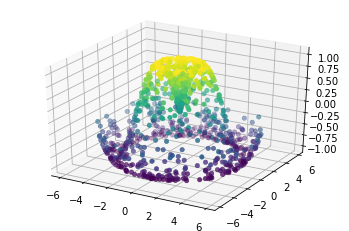

In [22]:
# 三维采样的曲面图
ax = plt.axes(projection='3d')
ax.scatter(x, y, z, c=z, cmap='viridis', linewidth=0.5)

In [ ]:
还有许多地方需要修补，这些可以用ax.plot_trisurf函数帮助完成。它首先找到一组所有点都连接起来的三角形，然后用这些三角形创建曲面，
示例代码如下：

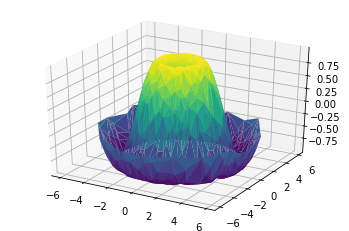

In [23]:
# 三角形剖分曲面图
ax = plt.axes(projection='3d')
ax.plot_trisurf(x, y, z, 
                cmap='viridis', edgecolor='none')

In [ ]:
## 莫比乌斯带

In [24]:
theta = np.linspace(0, 2 * np.pi, 30)
w = np.linspace(-0.25, 0.25, 8)
w, theta = np.meshgrid(w, theta)

In [25]:
phi = 0.5 * theta

In [26]:
# x - y平面内的半径
r = 1 + w * np.cos(phi)

x = np.ravel(r * np.cos(theta))
y = np.ravel(r * np.sin(theta))
z = np.ravel(r * np.sin(phi))

(-1, 1)

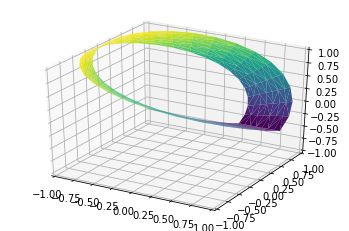

In [27]:
# 用基本参数化方法定义三角剖分
from matplotlib.tri import Triangulation 
tri = Triangulation(np.ravel(w), np.ravel(theta))

ax = plt.axes(projection='3d')
ax.plot_trisurf(x, y, z, triangles=tri.triangles, 
                cmap='viridis', linewidths=0.2)

ax.set_xlim(-1, 1); ax.set_ylim(-1, 1); ax.set_zlim(-1, 1)